In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#from pyproj import Proj, transform
from shapely.geometry import Point

In [2]:
slum = gpd.read_file(".\\KIANDA_shapefile\\KIANDA_STRUCTURES\\Population_2\\kianda_structures_and_population_dataset.shp")
water = gpd.read_file(".\\KIANDA_shapefile\\KIANDA_INFRA\\KIANDA_waterPT\\kibera_water_PT.shp")

In [3]:
water.crs

{'init': 'epsg:4326'}

In [4]:
from functools import partial
import pyproj
from shapely.ops import transform

project = partial(
    pyproj.transform,
    pyproj.Proj(init='epsg:4326'), # source coordinate system
    pyproj.Proj(init='epsg:26913')) # destination coordinate system



In [5]:
new_poly = []
for poly in slum['geometry']: 
    new_poly.append(transform(project, poly))

slum['geometry'] = pd.Series(new_poly)


In [6]:
new_poly = []
for poly in water['geometry']: 
    new_poly.append(transform(project, poly))

water['geometry'] = pd.Series(new_poly)
water2 = pd.Series(new_poly)


In [7]:
water

,kibera_wat,geometry
0,0.0,POINT (5110986.879665793 -19811257.52085197)
1,0.0,POINT (5110945.465853862 -19810896.54975133)
2,0.0,POINT (5110953.319346192 -19810981.09767273)
3,0.0,POINT (5110928.045962221 -19810999.96622773)
4,0.0,POINT (5110884.63832954 -19811022.62858019)
5,0.0,POINT (5110802.640445765 -19811002.88677077)
6,0.0,POINT (5110660.899532128 -19810838.02698201)
7,0.0,POINT (5111121.116508624 -19811533.16006425)
8,0.0,POINT (5111158.116463994 -19811532.49199345)
9,0.0,POINT (5111171.562122835 -19811425.97837738)


In [8]:
#slum_c = slum.loc[:,:]
#slum_c.drop(slum_c[slum_c["BUSI_C"] < 1].index)
slum_t = slum[slum["BUSI_C"] >= 1]
slum_c2 = slum_t[slum_t["STRUCTURE"] > 100 ]
slum_c2

,MAT_WOO_D,FAM_S_D,RENT_STR,RENT_MEAN,BUSINESS,GEOMETRY,MAT_M_D,OWNER,RENT_MIN,WOMEN,...,MAT_IR,FAM_UP,POP_R,STRUCTURE,MAT_BR_D,STR_CODE,FAM_SP,FAM_S,SERV_O,geometry
325,0.000,0.769,8100,900,1.0,0.0,1.000,0.0,700.0,1.0,...,0.0,2.0,18.0,125.0,0.000,KIAS2S125S,0.0,10.0,0.0,POLYGON ((5111143.599909721 -19811173.35936489...
499,0.000,0.667,6450,1075,1.0,0.0,1.000,1.0,800.0,2.0,...,0.0,1.0,14.0,175.0,0.000,KIAS2S175S,0.0,6.0,0.0,POLYGON ((5111077.428877065 -19811075.95683282...
577,0.000,0.000,4600,2300,6.0,0.0,0.833,0.0,2300.0,1.0,...,1.0,0.0,3.0,179.0,0.000,KIAS3S179S,0.0,0.0,0.0,POLYGON ((5110885.892003224 -19811150.45931288...
594,0.438,0.444,8400,1400,1.0,0.0,0.000,0.0,1300.0,8.0,...,7.0,0.0,18.0,152.0,0.125,KIAS3S152S,1.0,4.0,1.0,POLYGON ((5110886.613314902 -19811078.89957197...
595,0.000,0.375,20150,1550,3.0,0.0,0.875,0.0,800.0,12.0,...,2.0,0.0,51.0,169.0,0.000,KIAS3S169S,6.0,6.0,0.0,"POLYGON ((5110924.54747789 -19811092.27705823,..."
605,0.000,0.000,0,0,1.0,0.0,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,170.0,1.000,KIAS3S170S,0.0,0.0,0.0,POLYGON ((5110804.517328968 -19811105.89677404...
607,0.000,0.400,18000,3000,2.0,0.0,0.714,1.0,1000.0,5.0,...,1.0,0.0,18.0,139.0,0.143,KIAS3S139S,1.0,2.0,0.0,POLYGON ((5110827.406745029 -19811074.67676276...
614,0.000,0.000,0,0,1.0,0.0,0.000,0.0,0.0,0.0,...,1.0,0.0,0.0,136.0,0.000,KIAS3S136S,0.0,0.0,0.0,POLYGON ((5110863.999125799 -19811057.12945502...
694,0.000,0.000,0,0,1.0,0.0,1.000,0.0,0.0,0.0,...,0.0,0.0,0.0,147.0,0.000,KIAS3S147S,0.0,0.0,0.0,POLYGON ((5110839.888334556 -19811040.33441631...
1268,0.000,0.500,2000,1000,1.0,0.0,0.500,1.0,1000.0,2.0,...,2.0,0.0,7.0,158.0,0.000,KIAS7S158S,0.0,1.0,0.0,POLYGON ((5110759.335631507 -19811003.91013927...


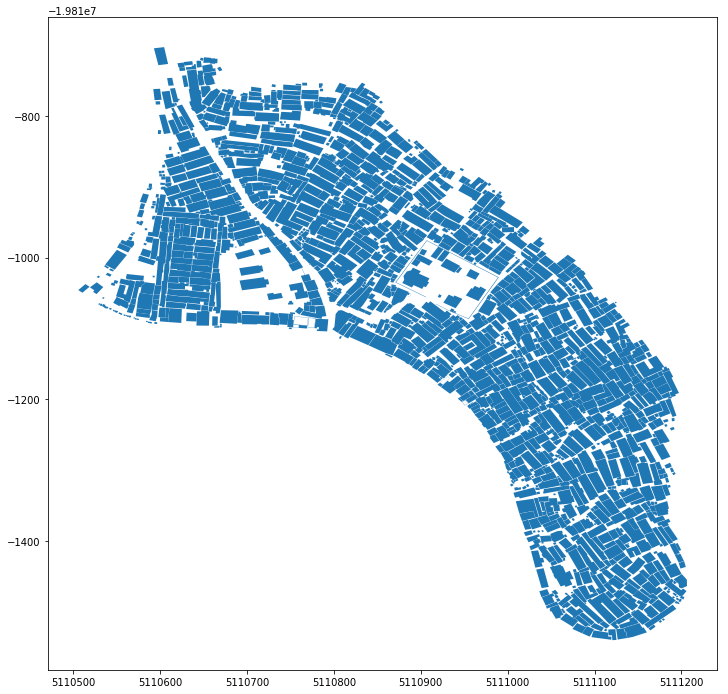

In [10]:
fig, ax = plt.subplots(1, figsize=(12,12))
#_ = ax.axis('off')
slum.plot(ax=ax)

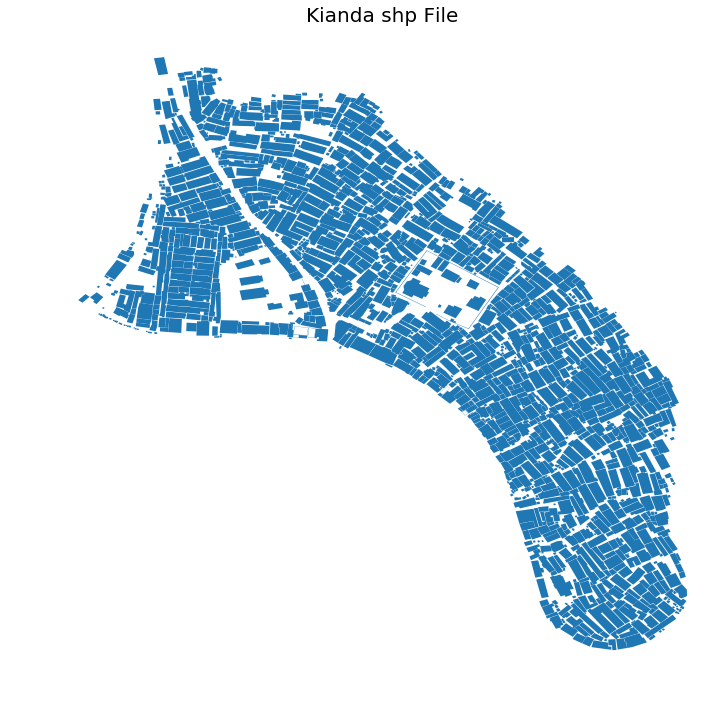

In [61]:
fig2, ax2 = plt.subplots(1, figsize=(12,12))
_ = ax2.axis('off')
ax2.set_title("Kianda shp File", fontsize = 20)
slum.plot(ax=ax2)

In [76]:
h1 = slum[slum["STR_CODE"] == "KIAS1S10S0"]
house_center = h1.centroid
house_center

6    POINT (5111107.441658971 -19811532.48324196)
dtype: object

In [77]:
business_centers = slum_c.centroid
business_centers

0       POINT (5111166.184482258 -19811521.60828013)
3       POINT (5111146.257498492 -19811526.07183233)
4       POINT (5111130.882351059 -19811530.72752675)
6       POINT (5111107.441658971 -19811532.48324196)
44      POINT (5111070.866247196 -19811511.05521587)
48      POINT (5111051.326977532 -19811490.07846634)
55      POINT (5111047.084314746 -19811482.00471042)
91      POINT (5111034.126479235 -19811425.05943739)
111      POINT (5111023.89564068 -19811388.55655085)
117     POINT (5111073.792624011 -19811384.60677179)
130     POINT (5111022.015831513 -19811376.90712375)
131      POINT (5111022.664777438 -19811364.1737028)
132     POINT (5111022.499403771 -19811351.30019518)
136     POINT (5111020.610999943 -19811332.26085394)
168     POINT (5111005.986344024 -19811307.90341382)
207     POINT (5111140.317952703 -19811360.68707977)
218     POINT (5111123.119330789 -19811297.65747813)
284       POINT (5110984.5629632 -19811255.22591133)
285       POINT (5110993.650823029 -19811247.9

In [35]:
#import pandas as pd
import math

In [36]:
distances = []
for point2 in business_centers:
    distance = (math.acos(math.sin(math.radians(house_center.y))*math.sin(math.radians(point2.y))+ \
                         math.cos(math.radians(house_center.y))*math.cos(math.radians(point2.y)) \
                         *math.cos(math.radians(point2.x)-math.radians(house_center.x)))*6371)*1000
    distances.append(distance)
    #print ("{0:8.4f}".format(distance))
distances.sort()
distances

[0.0,
 18.41695844170371,
 30.827670854228696,
 33.27275659015161,
 46.81417316321255,
 55.24785745989051,
 61.82569715107285,
 102.3779805942904,
 117.87531466946555,
 118.24743010323189,
 119.58701456601992,
 124.17210357590668,
 131.0563134780014,
 137.92511003594427,
 139.79196030971266,
 148.4590467537891,
 157.66032155663314,
 171.9718006181728,
 185.62366003769682,
 194.17411026258807,
 226.7079961153864,
 238.9641011869578,
 241.47822711476368,
 246.81116195263078,
 258.47058492402033,
 260.88159425469934,
 268.71957215766344,
 273.5281498946126,
 280.99550828102684,
 290.30931610569445,
 299.8188077415782,
 325.2184578512993,
 337.61710962553536,
 357.1410391799047,
 357.83612415878304,
 367.64374127839295,
 377.985410496483,
 389.08770632976035,
 403.41788366620455,
 411.59136854405585,
 414.09525521527456,
 416.4877849013793,
 420.83148217849725,
 421.7330906639956,
 426.28621276982307,
 427.0197407034581,
 427.4917177517424,
 431.40128704309393,
 435.9404901470126,
 437.151

In [44]:
import pandas as pd

In [99]:
dis_list = []
for x in water2:
    dis_list.append(float(house_center.distance(x)))
dist2 = pd.Series(dis_list)

In [89]:
dist2

0      59.740975
1      39.341779
2      23.506352
3       0.000000
4      42.390106
5      70.335073
6      78.683487
7     130.057639
8     166.417636
9     151.656546
10    177.486621
11    188.454824
12    200.106180
13    218.239703
14    246.433115
15    174.913613
16    235.348526
17    303.266881
18    306.405814
19    313.214348
20    330.797481
21    368.078424
22    328.009723
23    341.034185
24    380.519417
25    412.869561
26    466.110611
27    452.895002
28    540.515106
29    454.378364
         ...    
63    640.079400
64    650.719174
65    665.915170
66    694.025289
67    724.197678
68    595.494718
69    560.630434
70    628.259447
71    648.828815
72    709.932407
73    811.148208
74    795.018373
75    905.987529
76    770.387031
77    748.241048
78    795.766815
79    932.387842
80    916.359985
81    892.954193
82    652.266323
83    534.418908
84    522.866528
85    480.031108
86    347.142947
87    356.624656
88    428.651224
89    815.146451
90    755.7857

In [87]:
dist2[0][1]

KeyError: 1

In [ ]:
dis_list.sort()
dis_list

In [ ]:
f, ax = plt.subplots(1, figsize=(12, 12))
slum_c.plot(ax =ax)
f.suptitle("Kianda Commercial Businesses")
#slum_c.plot()

In [ ]:
water = gpd.read_file(".\\KIANDA_shapefile\\KIANDA_INFRA\\KIANDA_waterPT\\kibera_water_PT.shp")

In [ ]:
f, ax = plt.subplots(1, figsize=(12, 12))
water.plot(ax =ax)